# Filter data 

In [4]:
%load_ext autoreload
%autoreload 2

import scanpy as sc
import pandas as pd
import numpy as np
import scrna

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
adata = sc.read_h5ad("/fast-pool/ingn_data/bladder/BladderGEX_run2_demux.h5ad")
adata

AnnData object with n_obs × n_vars = 86024 × 33538 
    obs: 'batch', 'batch_num', 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'nCount_HASH', 'nFeature_HASH', 'sampleID', 'HASH_maxID', 'HASH_secondID', 'HASH_margin', 'HASH_classification', 'HASH_classification_global', 'hash_ID', 'Patient_Rep', 'Patient', 'cohort'
    var: 'gene_ids', 'feature_types', 'genome'

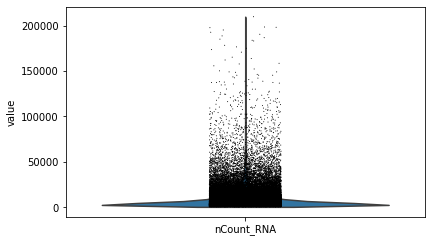

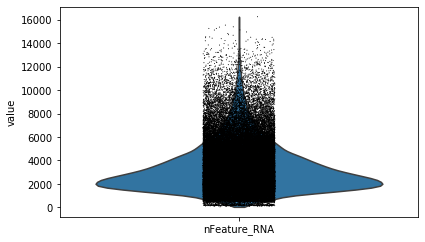

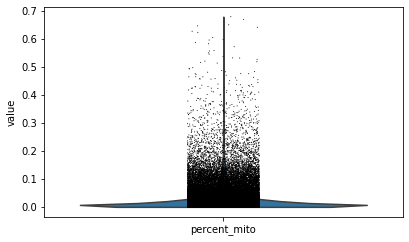

In [6]:
sc.pl.violin(adata, keys=['nCount_RNA'])
sc.pl.violin(adata, keys=['nFeature_RNA'])
sc.pl.violin(adata, keys=['percent_mito'])

In [8]:
print(np.quantile(adata.obs['nCount_RNA'], 0.05))
print(np.quantile(adata.obs['nCount_RNA'], 0.95))

1314.0
26297.699999999983


In [7]:
print(np.quantile(adata.obs['nFeature_RNA'], 0.05))
print(np.quantile(adata.obs['nFeature_RNA'], 0.95))

1053.0
7550.0


In [10]:
print((adata.obs['percent_mito'] < 0.1).sum())
print((adata.obs['percent_mito'] < 0.1).sum() / adata.shape[0])

81609
0.9486771133637124


In [11]:
condition = (adata.obs['percent_mito'] < 0.1) *\
            (adata.obs['nCount_RNA'] > 1314) *\
            (adata.obs['nCount_RNA'] < 26297) *\
            (adata.obs['nFeature_RNA'] > 1053) *\
            (adata.obs['nFeature_RNA'] < 7550)
print((condition).sum())
print((condition).sum() / adata.shape[0])

71832
0.8350227843392541


/home/ingn/anaconda3/envs/scrna/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [12]:
keep_barcodes = adata.obs_names[condition]
adata_filtered = adata[keep_barcodes]

Trying to set attribute `.uns` of view, copying.


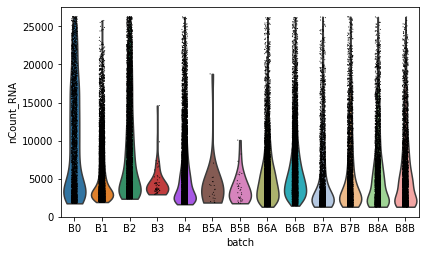

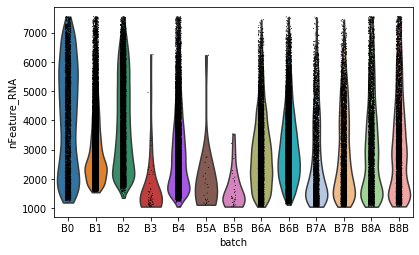

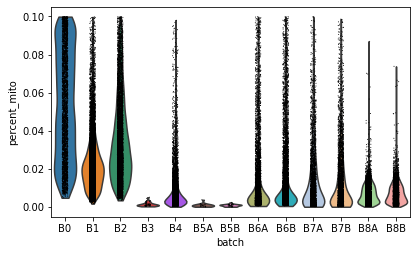

In [13]:
sc.pl.violin(adata_filtered, keys=['nCount_RNA']  , groupby='batch')
sc.pl.violin(adata_filtered, keys=['nFeature_RNA'], groupby='batch')
sc.pl.violin(adata_filtered, keys=['percent_mito'], groupby='batch')